<a href="https://colab.research.google.com/github/riesenn/geomsha/blob/main/ML_CIN_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Statistic tools
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats
from scipy.stats import ttest_ind, linregress
from pandas.plotting import scatter_matrix
!pip install umap-learn
import umap
#Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=96f03f9f67ec0cd48b6dbc781a236f882bce6357827492f1556389cd05d1d9f3
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=0b31fe2970efc4e0e82c982ed206032d08db423c60a2ea621182b643a3497d11
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [2]:
import pkg_resources

packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scipy', 'scipy.stats', 'umap-learn', 'sklearn', 'tensorflow']

installed_packages = pkg_resources.working_set

for package in installed_packages:
    if package.key in packages:
        print(package)

matplotlib 3.7.1
numpy 1.22.4
pandas 1.5.3
scipy 1.10.1
seaborn 0.12.2
tensorflow 2.12.0
umap-learn 0.5.3


In [4]:
import sklearn
print(sklearn.__version__)

1.2.2


In [5]:
#Mount Google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load different datasets to determine CIN (chromosomal instability) status

The Cancer Cell Line Encyclopedia (CCLE) project started in 2008 as a collaboration between the Broad Institute, and the Novartis Institutes for Biomedical Research and its Genomics Institute of the Novartis Research Foundation. The goal is to conduct a detailed genetic and pharmacologic characterization of a large panel of human cancer models, to develop integrated computational analyses that link distinct pharmacologic vulnerabilities to genomic patterns and to translate cell line integrative genomics into cancer patient stratification. Later the MD Anderson and Harvard Medical school joined the project. As of summer of 2018 CCLE continues its efforts as part of the Broad Cancer Dependency Map Project.

##cbioportal.org CCLE dataset


In [6]:
#Cbiooportal Data
df_CCLE = pd.read_table('/content/drive/MyDrive/CAS_ADS_23/all/PATIENT_DATA.tsv')
df_CCLE = df_CCLE[0:7]
#Transpose data
df_CCLE = df_CCLE.transpose()
#Make first row as header
df_CCLE.columns = df_CCLE.iloc[0]
df_CCLE = df_CCLE.iloc[2:]
df_CCLE

track_name,Mutation Count,Fraction Genome Altered,Ploidy,Genome Doublings,Mutation Rate,Doubling Time (hrs),TMB (nonsynonymous)
NCIH1563_LUNG,581,0.5419,3.87,1,272.0403023,165.5,19.6
A-673,16,0.1447,NaN,NaN,NaN,NaN,1.76825806577
A673_BONE,144,0.1457,2.01,0,61.21045057,NaN,4.86666666667
CAL27_UPPER_AERODIGESTIVE_TRACT,420,0.319,1.98,0,186.1487595,29.3,14.1333333333
CJM,46,0.5841,NaN,NaN,NaN,NaN,5.08374193909
...,...,...,...,...,...,...,...
Z138_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.0,NaN,NaN,NaN,NaN,NaN,NaN
143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN
253JBV_URINARY_TRACT.1,52.0,NaN,NaN,NaN,NaN,NaN,5.746839
253J_URINARY_TRACT.1,44.0,NaN,NaN,NaN,NaN,NaN,4.86271


In [7]:
# Function to replace characters by NaN mainly in Ploidy dataset
def replace_nonnumeric_with_nan(x):
    try:
        float(x)
        return x
    except ValueError:
        return np.nan

# Use the function on the dataset
df_CCLE  = df_CCLE.applymap(replace_nonnumeric_with_nan)
df_CCLE

track_name,Mutation Count,Fraction Genome Altered,Ploidy,Genome Doublings,Mutation Rate,Doubling Time (hrs),TMB (nonsynonymous)
NCIH1563_LUNG,581,0.5419,3.87,1,272.0403023,165.5,19.6
A-673,16,0.1447,NaN,NaN,NaN,NaN,1.76825806577
A673_BONE,144,0.1457,2.01,0,61.21045057,NaN,4.86666666667
CAL27_UPPER_AERODIGESTIVE_TRACT,420,0.319,1.98,0,186.1487595,29.3,14.1333333333
CJM,46,0.5841,NaN,NaN,NaN,NaN,5.08374193909
...,...,...,...,...,...,...,...
Z138_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.0,NaN,NaN,NaN,NaN,NaN,NaN
143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN
253JBV_URINARY_TRACT.1,52.0,NaN,NaN,NaN,NaN,NaN,5.746839
253J_URINARY_TRACT.1,44.0,NaN,NaN,NaN,NaN,NaN,4.86271


In [8]:
# Function to make Panda Dataframe nummeric
def to_numeric(cell):
    try:
        return float(cell)
    except ValueError:
        print(f'Could not transform {cell} to numeric')
        return cell

# Anwenden der Funktion auf alle Zellen im DataFrame, außer dem Header und der Spalte 0
df_CCLE.iloc[:, 1:] = df_CCLE.iloc[:, 1:].applymap(to_numeric)
df_CCLE

track_name,Mutation Count,Fraction Genome Altered,Ploidy,Genome Doublings,Mutation Rate,Doubling Time (hrs),TMB (nonsynonymous)
NCIH1563_LUNG,581,0.5419,3.87,1.0,272.040302,165.5,19.6
A-673,16,0.1447,NaN,NaN,NaN,NaN,1.768258
A673_BONE,144,0.1457,2.01,0.0,61.210451,NaN,4.866667
CAL27_UPPER_AERODIGESTIVE_TRACT,420,0.319,1.98,0.0,186.14876,29.3,14.133333
CJM,46,0.5841,NaN,NaN,NaN,NaN,5.083742
...,...,...,...,...,...,...,...
Z138_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.0,NaN,NaN,NaN,NaN,NaN,NaN
143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN
253JBV_URINARY_TRACT.1,52.0,NaN,NaN,NaN,NaN,NaN,5.746839
253J_URINARY_TRACT.1,44.0,NaN,NaN,NaN,NaN,NaN,4.86271


In [9]:
#Save as csv
df_CCLE.to_csv('CCLE.csv')
#Load csv again to get index
df_CCLE = pd.read_csv('CCLE.csv')
df_CCLE

,Unnamed: 0,Mutation Count,Fraction Genome Altered,Ploidy,Genome Doublings,Mutation Rate,Doubling Time (hrs),TMB (nonsynonymous)
0,NCIH1563_LUNG,581.0,0.5419,3.87,1.0,272.040302,165.5,19.600000
1,A-673,16.0,0.1447,NaN,NaN,NaN,NaN,1.768258
2,A673_BONE,144.0,0.1457,2.01,0.0,61.210451,NaN,4.866667
3,CAL27_UPPER_AERODIGESTIVE_TRACT,420.0,0.3190,1.98,0.0,186.148760,29.3,14.133333
4,CJM,46.0,0.5841,NaN,NaN,NaN,NaN,5.083742
...,...,...,...,...,...,...,...,...
2821,Z138_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2822,143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN
2823,253JBV_URINARY_TRACT.1,52.0,NaN,NaN,NaN,NaN,NaN,5.746839
2824,253J_URINARY_TRACT.1,44.0,NaN,NaN,NaN,NaN,NaN,4.862710


In [10]:
# change columns name in CCLE dataframe
df_CCLE.rename(columns = {'Unnamed: 0':'CCLEName'}, inplace = True)
df_CCLE.rename(columns = {'Fraction Genome Altered':'FGA'}, inplace = True)
df_CCLE.rename(columns = {'TMB (nonsynonymous)':'TMB'}, inplace = True)
df_CCLE.rename(columns = {'Doubling Time (hrs)':'Doubling Time'}, inplace = True)
df_CCLE
df_CCLE

,CCLEName,Mutation Count,FGA,Ploidy,Genome Doublings,Mutation Rate,Doubling Time,TMB
0,NCIH1563_LUNG,581.0,0.5419,3.87,1.0,272.040302,165.5,19.600000
1,A-673,16.0,0.1447,NaN,NaN,NaN,NaN,1.768258
2,A673_BONE,144.0,0.1457,2.01,0.0,61.210451,NaN,4.866667
3,CAL27_UPPER_AERODIGESTIVE_TRACT,420.0,0.3190,1.98,0.0,186.148760,29.3,14.133333
4,CJM,46.0,0.5841,NaN,NaN,NaN,NaN,5.083742
...,...,...,...,...,...,...,...,...
2821,Z138_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2822,143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN
2823,253JBV_URINARY_TRACT.1,52.0,NaN,NaN,NaN,NaN,NaN,5.746839
2824,253J_URINARY_TRACT.1,44.0,NaN,NaN,NaN,NaN,NaN,4.862710


##Models information from Depmap.org

In [11]:
#Load Modeldataset from Depmap
df_Models = pd.read_csv('/content/drive/MyDrive/CAS_ADS_23/all/Model.csv')
df_Models.head()

,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,GrowthPattern,...,SourceDetail,CatalogNumber,CCLEName,COSMICID,PublicComments,WTSIMasterCellID,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,60.0,Commercial,SIDM00105,CVCL_0465,HGSOC,Adherent,...,ATCC,NaN,NIHOVCAR3_OVARY,905933.0,NaN,2201.0,HGSOC,High-Grade Serous Ovarian Cancer,Ovarian Epithelial Tumor,Ovary/Fallopian Tube
1,ACH-000002,PT-5qa3uk,HL-60,HL60,36.0,Commercial,SIDM00829,CVCL_0002,AML,Suspension,...,ATCC,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,905938.0,NaN,55.0,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000003,PT-puKIyc,CACO2,CACO2,72.0,Commercial,SIDM00891,CVCL_0025,COAD,Adherent,...,ATCC,NaN,CACO2_LARGE_INTESTINE,NaN,NaN,NaN,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel
3,ACH-000004,PT-q4K2cp,HEL,HEL,30.0,Commercial,SIDM00594,CVCL_0001,AML,Suspension,...,DSMZ,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,907053.0,NaN,783.0,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,30.0,Commercial,SIDM00593,CVCL_2481,AML,Unknown,...,ATCC,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid


In [12]:
# New list only with ModelID and CCLEName
new_column_order = ['ModelID', 'CCLEName']

# Change order of columns
df_Models = df_Models[new_column_order]
df_Models

,ModelID,CCLEName
0,ACH-000001,NIHOVCAR3_OVARY
1,ACH-000002,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,ACH-000003,CACO2_LARGE_INTESTINE
3,ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
4,ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
...,...,...
1821,ACH-002785,NaN
1822,ACH-002800,NaN
1823,ACH-002834,PSS131R_Osteosarcoma
1824,ACH-002847,YUHOIN0650_Melanoma_Skin


In [24]:
#Combine datasets
df_CCLE = pd.merge(df_CCLE, df_Models, on='CCLEName')
df_CCLE

,CCLEName,Mutation Count,FGA,Ploidy,Genome Doublings,Mutation Rate,Doubling Time,TMB,ModelID
0,NCIH1563_LUNG,581.0,0.5419,3.87,1.0,272.040302,165.5,19.600000,ACH-000892
1,A673_BONE,144.0,0.1457,2.01,0.0,61.210451,NaN,4.866667,ACH-000052
2,CAL27_UPPER_AERODIGESTIVE_TRACT,420.0,0.3190,1.98,0.0,186.148760,29.3,14.133333,ACH-000832
3,EVSAT_BREAST,71.0,0.6386,NaN,NaN,NaN,NaN,7.846645,ACH-001065
4,HCC1500_BREAST,211.0,0.8699,1.75,0.0,89.269053,123.5,7.266667,ACH-000349
...,...,...,...,...,...,...,...,...,...
1576,UMUC10_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001412
1577,UMUC11_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001413
1578,UMUC13_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001407
1579,143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN,ACH-001001


In [25]:
print(df_CCLE.columns)


Index(['CCLEName', 'Mutation Count', 'FGA', 'Ploidy', 'Genome Doublings',
       'Mutation Rate', 'Doubling Time', 'TMB', 'ModelID'],
      dtype='object')


##Calculating CIN25 Score

Carter et al. (2006): A signature of chromosomal instability inferred from gene expression profiles predicts clinical outcome in multiple human cancers

In [14]:
#Copy Number Variation
expression_matrix = pd.read_csv('/content/drive/MyDrive/CAS_ADS_23/all/OmicsCNGene.csv')
#Rename column
expression_matrix.rename(columns = {'Unnamed: 0':'ModelID'}, inplace = True)
# only keep the gene symbol and remove the EntrezID from the gene names
expression_matrix.columns = [g.split(' ')[0] for g in expression_matrix.columns.tolist()]

expression_matrix

,ModelID,DDX11L1,WASH7P,MIR6859-1,MIR1302-2,FAM138A,OR4F5,WASH9P,MIR6859-2,OR4F29,...,BPY2C,TTTY4C,CSPG4P1Y,CDY1,TTTY3,SNORD38B,SCARNA4,SNORA50A,SNORD3D,POLR2J3
0,ACH-000759,1.675758,1.675758,1.675758,1.675758,1.675758,1.675758,1.675758,1.675758,1.675758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACH-000681,0.775472,0.775472,0.775472,0.775472,0.775472,0.775472,0.775472,0.775472,0.775472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACH-000769,2.988233,2.988233,2.988233,2.988233,2.988233,2.988233,0.831376,0.831376,0.831376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACH-002291,0.790799,0.790799,0.790799,0.790799,0.790799,0.790799,0.790799,0.790799,0.790799,...,0.450553,0.450553,0.450553,0.450553,0.450553,NaN,NaN,NaN,NaN,NaN
4,ACH-000853,1.083618,1.083618,1.083618,1.083618,1.083618,1.083618,1.083618,1.083618,1.083618,...,0.637717,0.637717,0.637717,0.637717,0.637717,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,ACH-000185,1.000350,1.000350,1.000350,1.000350,1.000350,1.000350,1.000350,1.000350,1.000350,...,0.047106,0.047106,0.155943,0.089672,0.089672,1.000950,1.040914,1.003705,0.995258,1.008223
1771,ACH-001044,0.542823,0.542823,0.542823,0.542823,0.542823,0.542823,1.043950,1.043950,1.043950,...,0.711068,0.711068,0.711068,0.711068,0.711068,1.057242,1.067719,0.852284,0.994610,1.258299
1772,ACH-000494,1.005360,1.005360,1.005360,1.005360,1.005360,1.005360,1.005360,1.005360,1.005360,...,0.078468,0.078468,0.140482,0.140482,0.140482,1.008726,0.990482,1.003003,1.002252,1.005009
1773,ACH-001087,1.038911,1.038911,1.038911,1.038911,1.038911,1.038911,1.038911,1.038911,1.038911,...,0.218842,0.218842,0.218842,0.218842,0.218842,1.045753,1.025980,1.090470,1.036552,1.074846


In [15]:
CIN25_genes = ['NCAPD2', 'ESPL1', 'CDK1', 'MELK', 'PRC1', 'KIF20A', 'TOP2A', 'TTK', 'TPX2', 'UBE2C',
        'MCM7', 'MCM2', 'RFC4', 'FEN1', 'CDC45', 'FOXM1', 'RAD51AP1', 'H2AZ1', 'MAD2L1',
        'PCNA', 'RNASEH2A', 'TGIF2', 'CCT5', 'TRIP13', 'CCNB2']

        #CNAP1 = NCAPD2, CDC2 = CDK1, H2AFZ =H2AZ1

In [16]:
#Only genes which intersect with expression matrix
found_genes = set(CIN25_genes).intersection(expression_matrix.columns)
missing_genes = set(CIN25_genes) - found_genes

num_cin25_genes = len(found_genes)
print(f'{num_cin25_genes} CIN25 genes found in the expression matrix.')

if missing_genes:
    print('The following genes were not found in the expression matrix:')
    for gene in missing_genes:
        print(gene)

25 CIN25 genes found in the expression matrix.


In [17]:
def calculate_cin25_score(expression_matrix):
    # Calculate median and MAD for each gene across all samples in the CCLE dataset
    medians = expression_matrix.median(axis=0, numeric_only=True)
    mads = (expression_matrix - expression_matrix.mean(numeric_only=True)).abs().mean(axis=0)

    # Calculate the expression of each of the 25 genes in each sample
    cin25_expression = expression_matrix.loc[:, CIN25_genes]

    # Calculate the Z-score for each gene in each sample
    cin25_zscores = (cin25_expression - medians[CIN25_genes]) / mads[CIN25_genes]

    # Calculate the CIN25 score for each sample
    cin25_scores = cin25_zscores.abs().mean(axis=1)

    return cin25_scores

In [18]:
# Calculate the CIN25 score for each cell line
cin25_scores = calculate_cin25_score(expression_matrix)
cin25_scores

0       0.956222
1       1.244294
2       1.396899
3       1.750480
4       1.362407
          ...   
1770    0.256438
1771    1.434045
1772    0.250081
1773    0.947796
1774    0.632857
Length: 1775, dtype: float64

In [19]:
#Prepare a datafrane from this data
df_cin25 = pd.DataFrame({'cin25_score': cin25_scores}, index=expression_matrix.index)
df_cin25['ModelID'] = expression_matrix['ModelID']
#Change order
new_column_order = ['ModelID', 'cin25_score']
df_cin25 = df_cin25[new_column_order]
df_cin25

,ModelID,cin25_score
0,ACH-000759,0.956222
1,ACH-000681,1.244294
2,ACH-000769,1.396899
3,ACH-002291,1.750480
4,ACH-000853,1.362407
...,...,...
1770,ACH-000185,0.256438
1771,ACH-001044,1.434045
1772,ACH-000494,0.250081
1773,ACH-001087,0.947796


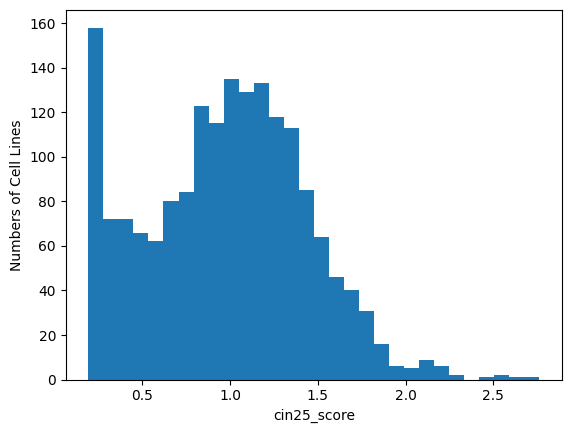

In [20]:
#Check distribution of cin_25 score
plt.figure()
plt.hist(df_cin25['cin25_score'], bins = 30)
plt.xlabel('cin25_score')
plt.ylabel('Numbers of Cell Lines')
plt.show()

In [27]:
#Add to dataset
df_CCLE = pd.merge(df_CCLE, df_cin25, on='ModelID', how='left')
df_CCLE

,CCLEName,Mutation Count,FGA,Ploidy,Genome Doublings,Mutation Rate,Doubling Time,TMB,ModelID,cin25_score
0,NCIH1563_LUNG,581.0,0.5419,3.87,1.0,272.040302,165.5,19.600000,ACH-000892,1.253648
1,A673_BONE,144.0,0.1457,2.01,0.0,61.210451,NaN,4.866667,ACH-000052,0.663602
2,CAL27_UPPER_AERODIGESTIVE_TRACT,420.0,0.3190,1.98,0.0,186.148760,29.3,14.133333,ACH-000832,0.669298
3,EVSAT_BREAST,71.0,0.6386,NaN,NaN,NaN,NaN,7.846645,ACH-001065,1.722894
4,HCC1500_BREAST,211.0,0.8699,1.75,0.0,89.269053,123.5,7.266667,ACH-000349,1.486972
...,...,...,...,...,...,...,...,...,...,...
1576,UMUC10_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001412,0.985577
1577,UMUC11_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001413,1.282299
1578,UMUC13_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001407,1.367886
1579,143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN,ACH-001001,0.952740


In [ ]:
# Load the CIN29 gene list with functional association with CIN
#CIN29_GENES = ['TPX2', 'PRC1', 'FOXM1', 'CDC2', 'TOP2A', 'CNAP1', 'KIF20A', 'MAD2L1',
               #'ESPL1', 'CCNB2', 'TTK', 'RFC4', 'ch-TOG', 'CDC20', 'CCNB1', 'AURKB',
               #'CDCA8', 'PTTG1', 'CEP55', 'H2AFX', 'BRRN1', 'MTB', 'ZWINT', 'FLJ10036',
               #'ECT2', 'RAD21', 'NEK2', 'STK6', 'KIF4A']


In [28]:
# Calculate the quantiles
quantiles = df_cin25['cin25_score'].quantile(q=[0.25, 0.5, 0.75])

# Assign quantile labels to each sample
df_cin25['cin25_quantile'] = np.nan
df_cin25.loc[df_cin25['cin25_score'] <= quantiles[0.25], 'cin25_quantile'] = 'Q1'
df_cin25.loc[(df_cin25['cin25_score'] > quantiles[0.25]) & (df_cin25['cin25_score'] <= quantiles[0.5]), 'cin25_quantile'] = 'Q2'
df_cin25.loc[(df_cin25['cin25_score'] > quantiles[0.5]) & (df_cin25['cin25_score'] <= quantiles[0.75]), 'cin25_quantile'] = 'Q3'
df_cin25.loc[df_cin25['cin25_score'] > quantiles[0.75], 'cin25_quantile'] = 'Q4'

quantiles

0.25    0.635208
0.50    1.001764
0.75    1.289895
Name: cin25_score, dtype: float64

In [29]:
# Define the order of the categories
quantile_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Convert the 'Quantile' column to an ordered categorical variable
df_cin25['cin25_quantile'] = pd.Categorical(df_cin25['cin25_quantile'], categories=quantile_order, ordered=True)

# Sort the DataFrame by the 'Quantile' column
df_cin25 = df_cin25.sort_values('cin25_quantile')

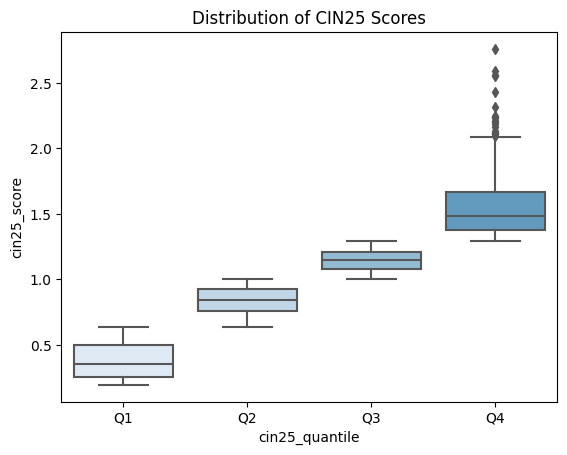

In [30]:
# Set the color palette
sns.set_palette("Blues")

# Create a boxplot with quantiles
sns.boxplot(x='cin25_quantile', y='cin25_score', data=df_cin25)

# Add labels and title
plt.xlabel('cin25_quantile')
plt.ylabel('cin25_score')
plt.title('Distribution of CIN25 Scores')

# Show the plot
plt.show()

In [31]:
df_CCLE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1581 entries, 0 to 1580
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CCLEName          1581 non-null   object 
 1   Mutation Count    1581 non-null   float64
 2   FGA               987 non-null    float64
 3   Ploidy            955 non-null    float64
 4   Genome Doublings  955 non-null    float64
 5   Mutation Rate     920 non-null    float64
 6   Doubling Time     529 non-null    float64
 7   TMB               1525 non-null   float64
 8   ModelID           1581 non-null   object 
 9   cin25_score       1560 non-null   float64
dtypes: float64(8), object(2)
memory usage: 135.9+ KB


Correlation coefficient: 0.7620135550788593


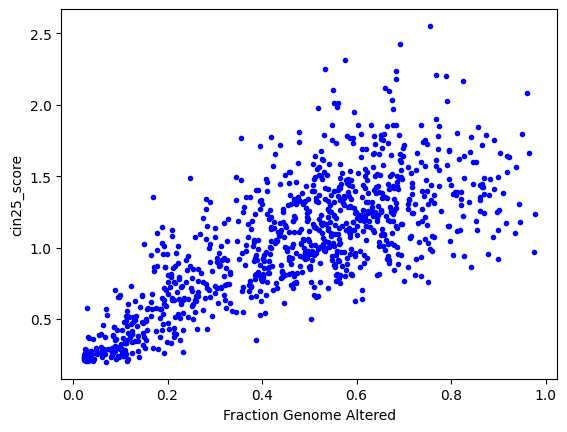

In [32]:
#Correlation FGA and CIN25 score
#Pearson corr
corr = df_CCLE['FGA'].corr(df_CCLE['cin25_score'], method='pearson')
print('Correlation coefficient:', corr)

plt.figure()
plt.plot(df_CCLE['FGA'], df_CCLE['cin25_score'], marker='.', linestyle='None', color = 'blue')
plt.xlabel('Fraction Genome Altered')
plt.ylabel('cin25_score')
plt.show()


##Calculating altered Ratio by using CNV
The number of copy-number alterations was calculated using segmented copy-number data (=cbioportal.org), whereby segments with a mean log2 copy-number ratio value >0.2 or < −0.2 were deemed altered [32,33].
32. Bandla S, Pennathur A, Luketich JD, Beer DG, Lin L, Bass AJ, et al. Comparative genomics of esophageal adenocarcinoma and squamous cell carcinoma. Ann Thorac Surg. 2012;93:1101–6. doi: 10.1016/j.athoracsur.2012.01.064.
33. Tagawa H, Karnan S, Suzuki R, Matsuo K, Zhang X, Ota A, et al. Genome-wide array-based CGH for mantle cell lymphoma: identification of homozygous deletions of the proapoptotic gene BIM. Oncogene. 2005;24:1348–58. doi: 10.1038/sj.onc.1208300.

Segment_Mean is the arithmetic mean of those probes 'log2 copy ratio values'.



In [33]:
df_CNV= pd.read_csv('/content/drive/MyDrive/CAS_ADS_23/all/ccle_broad_2019_segments.seg', sep ='\t')
df_CNV


,ID,chrom,loc.start,loc.end,num.mark,seg.mean
0,DMS53_LUNG,1,61735,1226868,171,0.0849
1,DMS53_LUNG,1,1226869,1296512,23,0.6106
2,DMS53_LUNG,1,1296513,14367797,6900,0.1397
3,DMS53_LUNG,1,14367798,14369416,4,-0.8525
4,DMS53_LUNG,1,14369417,16147286,1315,0.1519
...,...,...,...,...,...,...
812540,S117_SOFT_TISSUE,Y,25976912,26043092,22,-4.7257
812541,S117_SOFT_TISSUE,Y,26043093,26631299,166,-3.2467
812542,S117_SOFT_TISSUE,Y,26631300,27002546,59,-4.4375
812543,S117_SOFT_TISSUE,Y,27002547,28431027,368,-3.3641


In [34]:
df_CNV.rename(columns = {'ID':'CCLEName'}, inplace = True)
df_CNV

,CCLEName,chrom,loc.start,loc.end,num.mark,seg.mean
0,DMS53_LUNG,1,61735,1226868,171,0.0849
1,DMS53_LUNG,1,1226869,1296512,23,0.6106
2,DMS53_LUNG,1,1296513,14367797,6900,0.1397
3,DMS53_LUNG,1,14367798,14369416,4,-0.8525
4,DMS53_LUNG,1,14369417,16147286,1315,0.1519
...,...,...,...,...,...,...
812540,S117_SOFT_TISSUE,Y,25976912,26043092,22,-4.7257
812541,S117_SOFT_TISSUE,Y,26043093,26631299,166,-3.2467
812542,S117_SOFT_TISSUE,Y,26631300,27002546,59,-4.4375
812543,S117_SOFT_TISSUE,Y,27002547,28431027,368,-3.3641


In [35]:
#Quality Check
def remove_chrY_segments(CCLEName):
    # Iterate over the cell lines
    for chr in CCLEName:
        # Count the number of "chrY" segments in the current cell line
        chrY_count = chr.count('Y')

        # Check if the count is greater than 150
        if chrY_count > 150:
            return True  # Return True if a cell line with more than 150 segments is found
    return False  # Return False if no cell line with more than 150 segments is found

result = remove_chrY_segments(df_CNV)
if result:
    print('There is at least one cell line with more than 150 chr. Y segments.')
else:
    print('There are no cell lines with more than 150 chr. Y segments.')

There are no cell lines with more than 150 chr. Y segments.


In [36]:
#Mark samples that have more than 1500 segments as QC fails and remove them
def check_cell_lines(CCLEName):
    # Iterate over the cell lines
    for cell_line in CCLEName:
        # Check the number of segments in the current cell line
        if len(cell_line) > 1500:
            return True  # Return True if a cell line with more than 1500 segments is found
    return False  # Return False if no cell line with more than 1500 segments is found


result = check_cell_lines(df_CNV)
if result:
    print('There is at least one cell line with more than 1500 segments.')
else:
    print('There are no cell lines with more than 1500 segments.')

There are no cell lines with more than 1500 segments.


In [37]:
#Calculating Altered Ratio
def mark_altered_segments(cell_lines, threshold=0.2):
    cell_lines['Altered'] = False  # Add a new 'Altered' column and initialize it with False

    for i, row in cell_lines.iterrows():
        seg = row['seg.mean']
        seg_value = float(seg)
        if seg_value > threshold or seg_value < -threshold:
            cell_lines.at[i, 'Altered'] = True  # Mark the 'Altered' column as True

    grouped = cell_lines.groupby('CCLEName')

    altered_segments = grouped['Altered'].transform('sum')
    total_segments = grouped['Altered'].transform('size')
    cell_lines['Altered Ratio'] = altered_segments / total_segments
    return cell_lines

marked_cell_lines = mark_altered_segments(df_CNV, threshold=0.2)
print(marked_cell_lines)



                CCLEName chrom  loc.start   loc.end  num.mark  seg.mean  \
0             DMS53_LUNG     1      61735   1226868       171    0.0849   
1             DMS53_LUNG     1    1226869   1296512        23    0.6106   
2             DMS53_LUNG     1    1296513  14367797      6900    0.1397   
3             DMS53_LUNG     1   14367798  14369416         4   -0.8525   
4             DMS53_LUNG     1   14369417  16147286      1315    0.1519   
...                  ...   ...        ...       ...       ...       ...   
812540  S117_SOFT_TISSUE     Y   25976912  26043092        22   -4.7257   
812541  S117_SOFT_TISSUE     Y   26043093  26631299       166   -3.2467   
812542  S117_SOFT_TISSUE     Y   26631300  27002546        59   -4.4375   
812543  S117_SOFT_TISSUE     Y   27002547  28431027       368   -3.3641   
812544  S117_SOFT_TISSUE     Y   28431028  59018259       183   -2.5615   

        Altered  Altered Ratio  
0         False       0.817337  
1          True       0.817337  


In [38]:
df_CNV = df_CNV.groupby('CCLEName').first().reset_index()[['CCLEName', 'Altered Ratio']]
df_CNV

,CCLEName,Altered Ratio
0,A101D_SKIN,0.842105
1,A1207_CENTRAL_NERVOUS_SYSTEM,0.769831
2,A172_CENTRAL_NERVOUS_SYSTEM,0.821834
3,A204_SOFT_TISSUE,0.511381
4,A2058_SKIN,0.618557
...,...,...
956,YD8_UPPER_AERODIGESTIVE_TRACT,0.744292
957,YH13_CENTRAL_NERVOUS_SYSTEM,0.660354
958,YKG1_CENTRAL_NERVOUS_SYSTEM,0.713450
959,ZR751_BREAST,0.696270


In [39]:
#Add it to dataset
df_CCLE = pd.merge(df_CCLE, df_CNV, on='CCLEName', how='left')
df_CCLE

,CCLEName,Mutation Count,FGA,Ploidy,Genome Doublings,Mutation Rate,Doubling Time,TMB,ModelID,cin25_score,Altered Ratio
0,NCIH1563_LUNG,581.0,0.5419,3.87,1.0,272.040302,165.5,19.600000,ACH-000892,1.253648,0.755714
1,A673_BONE,144.0,0.1457,2.01,0.0,61.210451,NaN,4.866667,ACH-000052,0.663602,0.581446
2,CAL27_UPPER_AERODIGESTIVE_TRACT,420.0,0.3190,1.98,0.0,186.148760,29.3,14.133333,ACH-000832,0.669298,0.649499
3,EVSAT_BREAST,71.0,0.6386,NaN,NaN,NaN,NaN,7.846645,ACH-001065,1.722894,0.790155
4,HCC1500_BREAST,211.0,0.8699,1.75,0.0,89.269053,123.5,7.266667,ACH-000349,1.486972,0.891341
...,...,...,...,...,...,...,...,...,...,...,...
1576,UMUC10_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001412,0.985577,NaN
1577,UMUC11_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001413,1.282299,NaN
1578,UMUC13_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001407,1.367886,NaN
1579,143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN,ACH-001001,0.952740,NaN


#Descriptive statistic

<ipython-input-40-1339cf548fd6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_CCLE.corr()


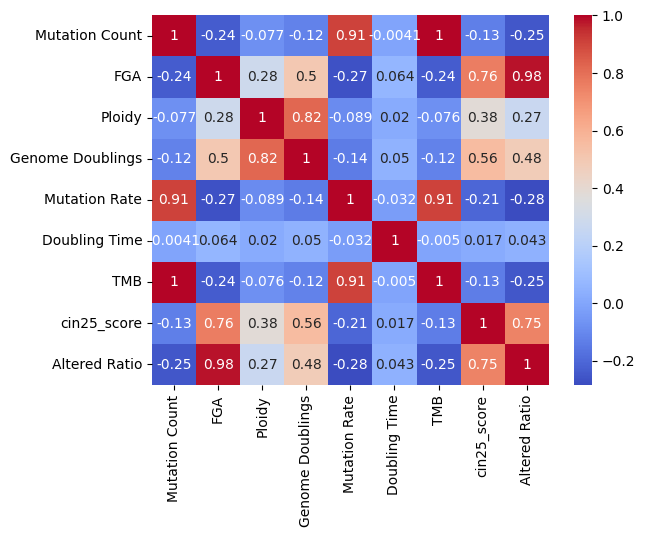

In [40]:
#Correlation matrix
corr_matrix = df_CCLE.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

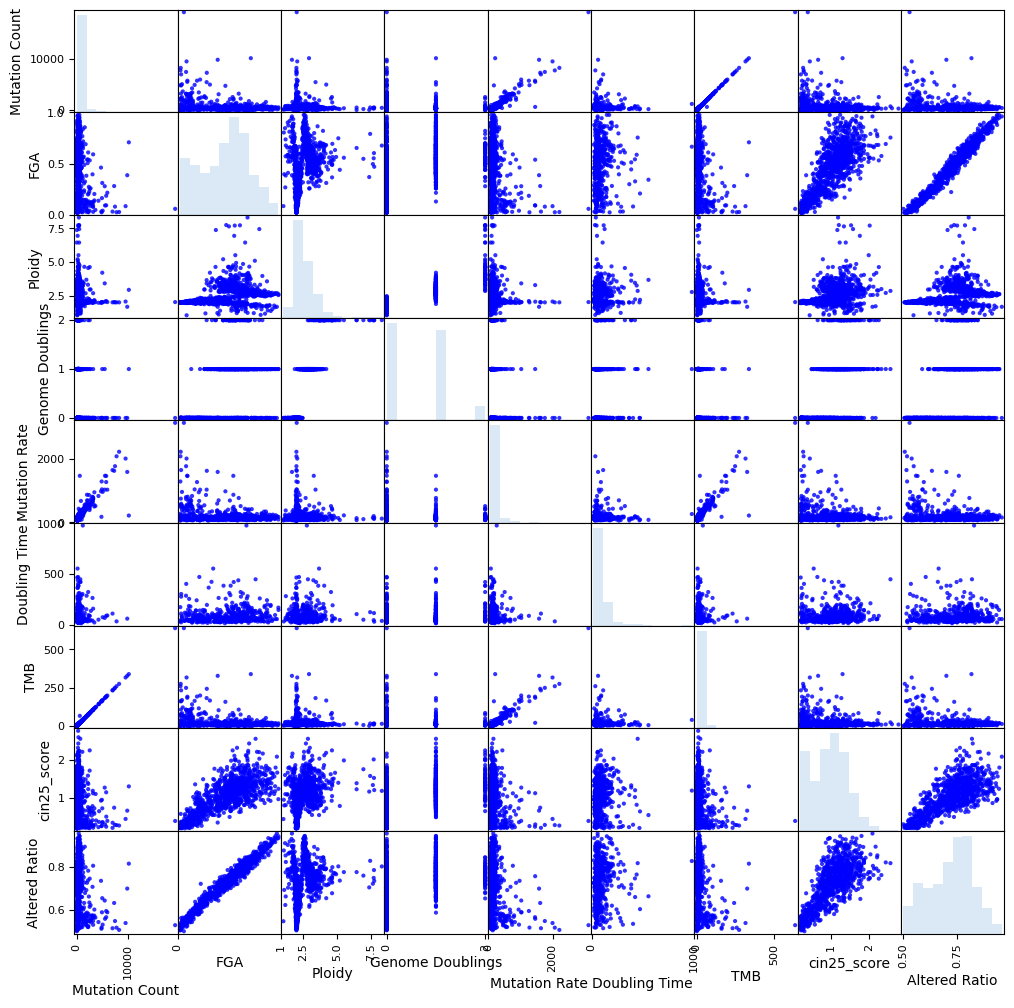

In [41]:
#Scatter Matrix
scatter_matrix(df_CCLE, alpha=0.8, figsize=(12,12), diagonal='hist', color = 'blue')
plt.show()

FGA, Altered Ratio, cin25, genome doubling and Ploidy correlate very well together.

TMB, Mutation Rate and Mutation Count correlate very well together.


#Clustering
Kmeans can only be calculated when we have information for all features, no NaNs.

In [42]:
df_CCLE_new = df_CCLE[['CCLEName','FGA', 'Altered Ratio', 'cin25_score', 'Ploidy']].dropna()
df_CCLE_new


,CCLEName,FGA,Altered Ratio,cin25_score,Ploidy
0,NCIH1563_LUNG,0.5419,0.755714,1.253648,3.87
1,A673_BONE,0.1457,0.581446,0.663602,2.01
2,CAL27_UPPER_AERODIGESTIVE_TRACT,0.3190,0.649499,0.669298,1.98
4,HCC1500_BREAST,0.8699,0.891341,1.486972,1.75
5,HCC1806_BREAST,0.4460,0.742901,1.072556,2.38
...,...,...,...,...,...
1517,YD38_UPPER_AERODIGESTIVE_TRACT,0.4674,0.711864,1.343166,2.91
1518,YH13_CENTRAL_NERVOUS_SYSTEM,0.3312,0.660354,0.829077,1.96
1519,YKG1_CENTRAL_NERVOUS_SYSTEM,0.4721,0.713450,0.964904,3.19
1524,ZR751_BREAST,0.3956,0.696270,1.324337,3.30


In [43]:
# Select relevant attributes and normalize the data
X = df_CCLE_new[['FGA', 'Altered Ratio', 'cin25_score', 'Ploidy']]
X = StandardScaler().fit_transform(X)

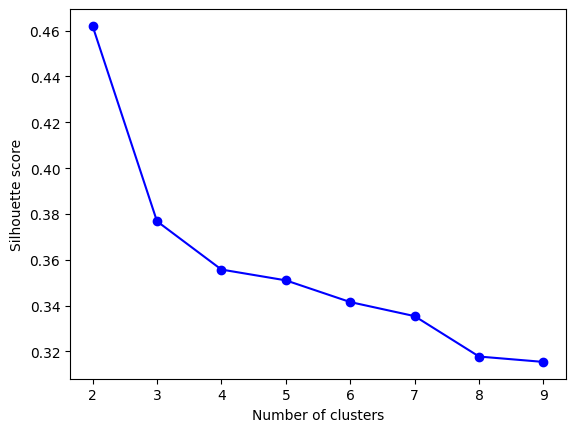

In [44]:
#KMeans
from sklearn.metrics import silhouette_score
sil=[]
for iclust in range(2,10):
    clusterer = KMeans(n_clusters=iclust, n_init = 'auto')
    cluster_labels = clusterer.fit_predict(X)
    score = silhouette_score(X,cluster_labels)
    sil.append(score)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.plot(np.arange(len(sil))+2, sil,'-o', color = 'blue')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
labels = kmeans.labels_
labels

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [46]:
umap_model = umap.UMAP(n_neighbors=30, n_components=2, min_dist=0.0, random_state=1711) #parameters choosen for good clustering
umap = umap_model.fit_transform(X) #low level representation of the data


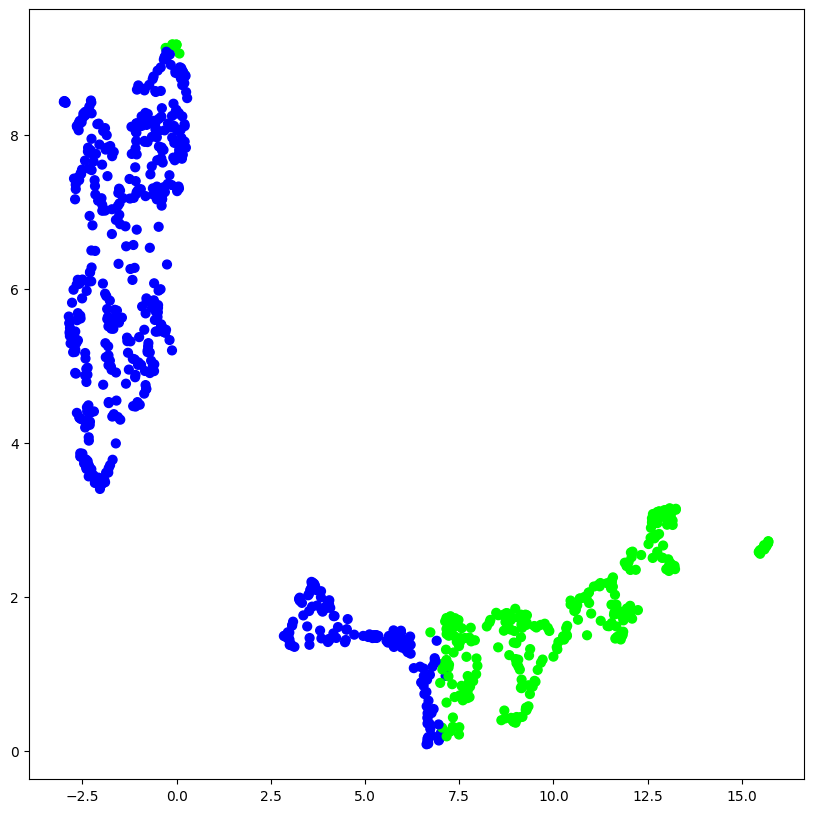

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(umap[:, 0], umap[:, 1], s=40, c=kmeans.labels_, cmap='brg') #using KMean Cluster Labels
plt.show()

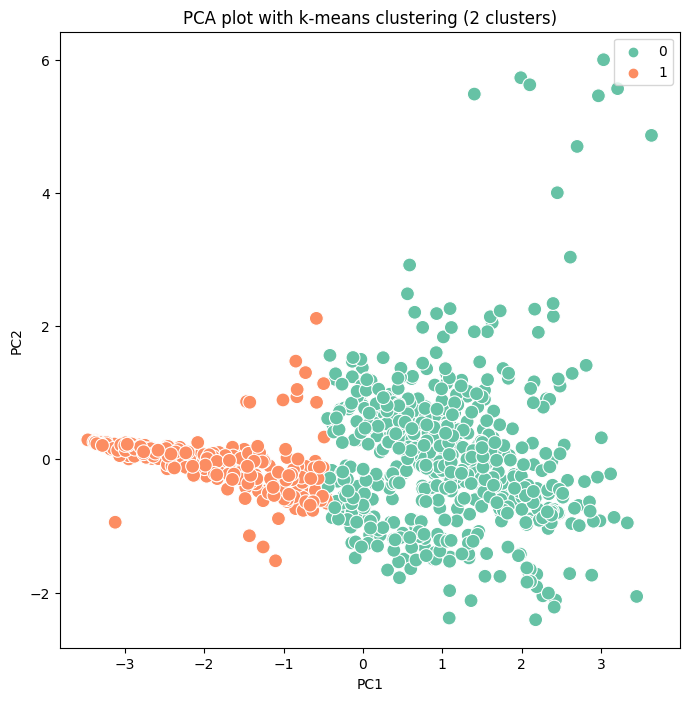

In [48]:
# Fit a PCA model to the data and transform it into two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the principal components with points colored by cluster

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2', s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot with k-means clustering ({} clusters)'.format(2))
plt.show()

In [49]:
# Add the cluster labels to the original dataframe
df_CCLE_new['cluster'] = labels
df_CCLE_new

,CCLEName,FGA,Altered Ratio,cin25_score,Ploidy,cluster
0,NCIH1563_LUNG,0.5419,0.755714,1.253648,3.87,0
1,A673_BONE,0.1457,0.581446,0.663602,2.01,1
2,CAL27_UPPER_AERODIGESTIVE_TRACT,0.3190,0.649499,0.669298,1.98,1
4,HCC1500_BREAST,0.8699,0.891341,1.486972,1.75,0
5,HCC1806_BREAST,0.4460,0.742901,1.072556,2.38,0
...,...,...,...,...,...,...
1517,YD38_UPPER_AERODIGESTIVE_TRACT,0.4674,0.711864,1.343166,2.91,0
1518,YH13_CENTRAL_NERVOUS_SYSTEM,0.3312,0.660354,0.829077,1.96,1
1519,YKG1_CENTRAL_NERVOUS_SYSTEM,0.4721,0.713450,0.964904,3.19,0
1524,ZR751_BREAST,0.3956,0.696270,1.324337,3.30,0


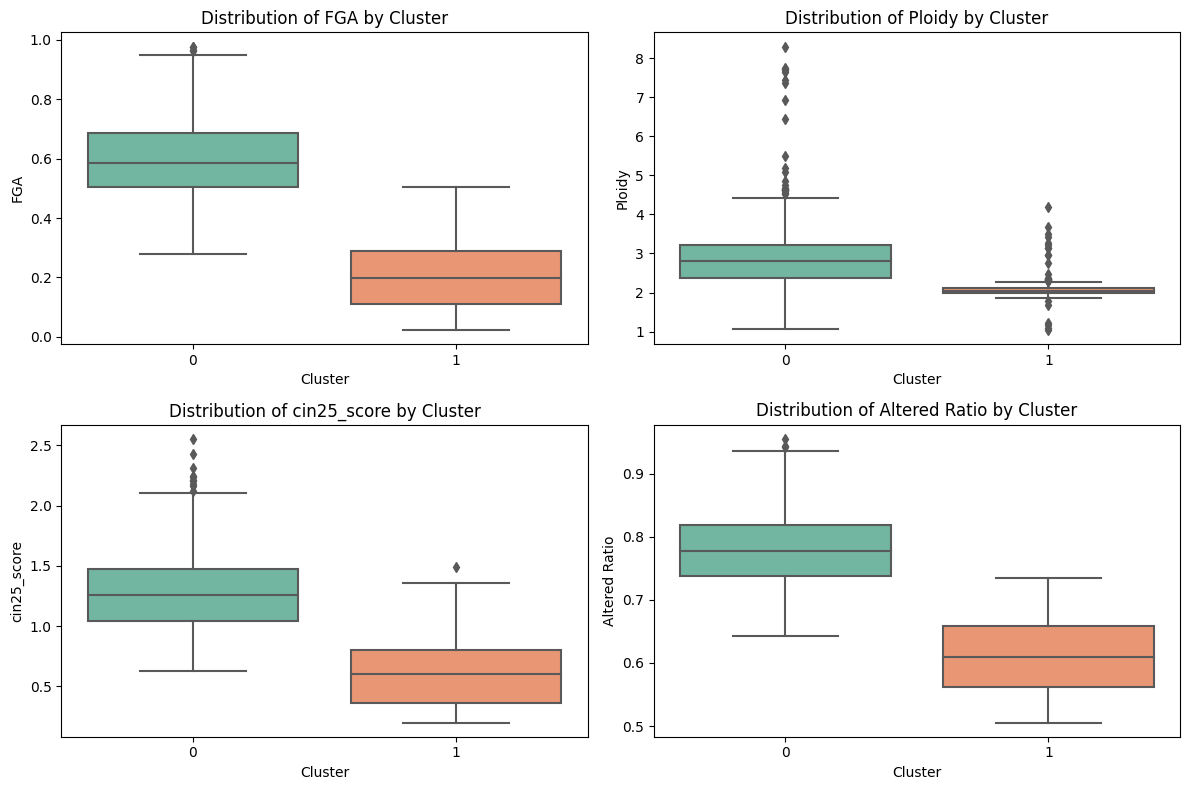

In [50]:
features = ['FGA', 'Ploidy', 'cin25_score', 'Altered Ratio']
num_plots = len(features)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    sns.boxplot(x='cluster', y=feature, data=df_CCLE_new, palette='Set2', ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)
    ax.set_title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()

Cluster 0 represents CINhigh and Cluster 1 CINlow

#Machine Learning

##Train Model on dataset with clusters

In [51]:
from sklearn.model_selection import train_test_split

# Specify the features and target variable
features = ['FGA', 'Ploidy', 'cin25_score', 'Altered Ratio']
target = 'cluster'

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(df_CCLE_new[features], df_CCLE_new[target], test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print('Training set shape:', x_train.shape)
print('Validation set shape:', x_val.shape)



Training set shape: (713, 4)
Validation set shape: (179, 4)


In [52]:
input_shape = (4,)

# Define the model architecture
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming you have 2 cluster classes
])
#Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #ADAM better optimizer
# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Train the model
hist = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/50
23/23 [==============================] - 1s 14ms/step - loss: 0.6162 - accuracy: 0.6171 - val_loss: 0.5993 - val_accuracy: 0.6257
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.6550 - val_loss: 0.5475 - val_accuracy: 0.6257
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7097 - val_loss: 0.4839 - val_accuracy: 0.7207
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.8065 - val_loss: 0.4101 - val_accuracy: 0.7989
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.3402 - accuracy: 0.8668 - val_loss: 0.3475 - val_accuracy: 0.8492
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.9088 - val_loss: 0.3142 - val_accuracy: 0.8436
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.2349 - accuracy: 0.9187 - val_loss: 0.2581 - val_accuracy: 0.8939
Epoch 8/50
23/23 [=

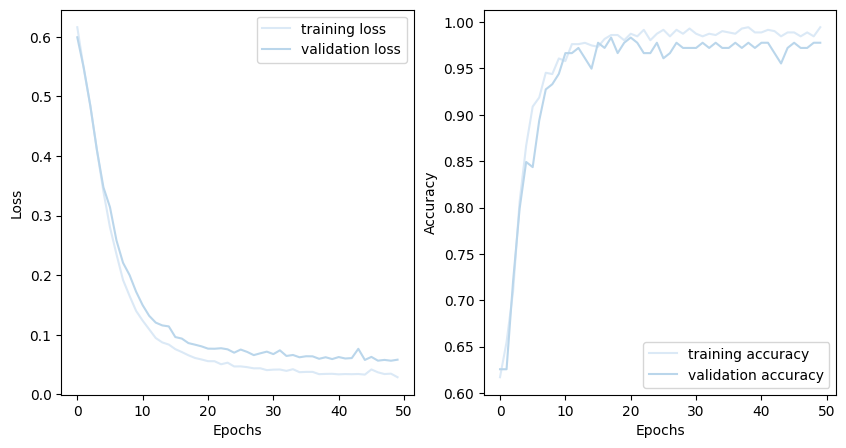

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
plt.show()

##Use Model to train dataset without clusters

In [55]:
df_CCLE_ML = pd.merge(df_CCLE, df_CCLE_new[['CCLEName', 'cluster']], how='outer', on = 'CCLEName')
df_CCLE_ML

,CCLEName,Mutation Count,FGA,Ploidy,Genome Doublings,Mutation Rate,Doubling Time,TMB,ModelID,cin25_score,Altered Ratio,cluster
0,NCIH1563_LUNG,581.0,0.5419,3.87,1.0,272.040302,165.5,19.600000,ACH-000892,1.253648,0.755714,0.0
1,A673_BONE,144.0,0.1457,2.01,0.0,61.210451,NaN,4.866667,ACH-000052,0.663602,0.581446,1.0
2,CAL27_UPPER_AERODIGESTIVE_TRACT,420.0,0.3190,1.98,0.0,186.148760,29.3,14.133333,ACH-000832,0.669298,0.649499,1.0
3,EVSAT_BREAST,71.0,0.6386,NaN,NaN,NaN,NaN,7.846645,ACH-001065,1.722894,0.790155,NaN
4,HCC1500_BREAST,211.0,0.8699,1.75,0.0,89.269053,123.5,7.266667,ACH-000349,1.486972,0.891341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1576,UMUC10_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001412,0.985577,NaN,NaN
1577,UMUC11_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001413,1.282299,NaN,NaN
1578,UMUC13_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001407,1.367886,NaN,NaN
1579,143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN,ACH-001001,0.952740,NaN,NaN


In [56]:
#Use the trained model for the rest of the dataset which contains NaNs
# Extract the features from the CCLE dataset
features = df_CCLE_ML[['FGA', 'Ploidy', 'cin25_score', 'Altered Ratio']]

# Check if 'cluster' has NaN values in the new dataset
has_nan = df_CCLE_ML['cluster'].isna()

# Select the features with NaN values
features_with_nan = features[has_nan]

# Replace the NaN values with a placeholder value = 1 (CIN Low)
features_with_nan = features_with_nan.fillna(1)

# Convert the features to a NumPy array
features_array = features_with_nan.values

# Convert the NumPy array to a TensorFlow tensor
features_tensor = tf.convert_to_tensor(features_array, dtype=tf.float32)

# Make predictions for instances with NaN values
nan_predictions = model.predict(features_tensor)

# Convert the predictions to cluster labels (0 or 1)
nan_predicted_labels = np.argmax(nan_predictions, axis=1)

# Create a new column for the predicted cluster labels
df_CCLE_ML['predicted_cluster'] = df_CCLE_ML['cluster']

# Replace the NaN values in 'predicted_cluster' with the predicted labels
df_CCLE_ML.loc[has_nan, 'predicted_cluster'] = nan_predicted_labels



22/22 [==============================] - 0s 1ms/step


In [57]:
df_CCLE_ML

,CCLEName,Mutation Count,FGA,Ploidy,Genome Doublings,Mutation Rate,Doubling Time,TMB,ModelID,cin25_score,Altered Ratio,cluster,predicted_cluster
0,NCIH1563_LUNG,581.0,0.5419,3.87,1.0,272.040302,165.5,19.600000,ACH-000892,1.253648,0.755714,0.0,0.0
1,A673_BONE,144.0,0.1457,2.01,0.0,61.210451,NaN,4.866667,ACH-000052,0.663602,0.581446,1.0,1.0
2,CAL27_UPPER_AERODIGESTIVE_TRACT,420.0,0.3190,1.98,0.0,186.148760,29.3,14.133333,ACH-000832,0.669298,0.649499,1.0,1.0
3,EVSAT_BREAST,71.0,0.6386,NaN,NaN,NaN,NaN,7.846645,ACH-001065,1.722894,0.790155,NaN,0.0
4,HCC1500_BREAST,211.0,0.8699,1.75,0.0,89.269053,123.5,7.266667,ACH-000349,1.486972,0.891341,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,UMUC10_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001412,0.985577,NaN,NaN,0.0
1577,UMUC11_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001413,1.282299,NaN,NaN,0.0
1578,UMUC13_URINARY_TRACT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ACH-001407,1.367886,NaN,NaN,0.0
1579,143B_BONE,0.0,0.5014,3.61,2.0,NaN,NaN,NaN,ACH-001001,0.952740,NaN,NaN,0.0


In [58]:
df_CCLE_ML.to_csv('df_CCLE_pred')